In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
trainDF = pd.read_csv("../train-treated2.csv")
testDF = pd.read_csv("../test-treated2.csv")

sns.catplot -> This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use

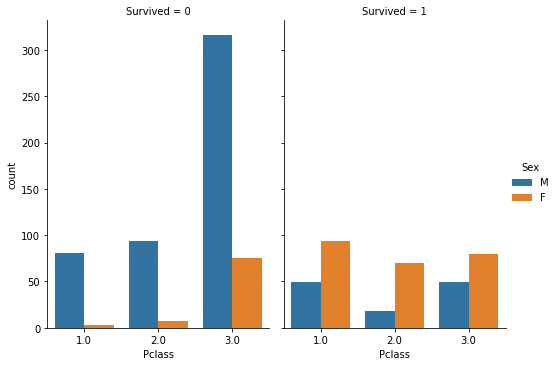

In [3]:
graph1 = sns.catplot(x='Pclass', hue='Sex', col='Survived', data=trainDF, kind="count", height=5, aspect=0.7)
graph1.fig.suptitle = 'Passageiros por Classe e Sexo'
graph1.set_ylabels = 'Quantidade de passageiros'
graph1.set_xlabels = 'Número da Classe'

In [ ]:
a = trainDF.groupby('Pclass').agg({'Survived':['sum', 'count'], 'Age': np.mean, 'Title':(pd.Series.nunique)})
a['survived','% of survivors'] = round(a['Survived']['sum']/a['Survived']['count'].values*100, 2)
print(type(a))
a

In [ ]:
#b = a.reset_index(level='Pclass', axis=0)
b

In [ ]:
b.reset_index()

In [ ]:
# plotting graph
plt.bar(x=b.index, y=b.count, data='b')

plotar um barplot com a variavel 'a'

In [4]:
def Family_Binary(df):
    
    df['Family_Id']= np.where( ( (df['SibSp']==0) & (df['Parch']==0) ), 0, df['SibSp']+df['Parch'])
    
    return df

Family_Binary(trainDF)
Family_Binary(testDF)
trainDF.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleCategory,Sex_Id,Family_Id
0,1,0,3.0,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0,1


In [5]:
testDF.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleCategory,Sex_Id,Family_Id
0,892,3,"Kelly, Mr. James",M,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",F,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,0,1


In [6]:
TreatedTrainDF = trainDF.to_csv('../train-treated3.csv', index=False)
TreatedTestDF = testDF.to_csv('../test-treated3.csv', index=False)

In [7]:
print('Relação entre familiares e classe')
familia = pd.crosstab([trainDF.Family_Id, trainDF.Survived], trainDF.Pclass).transpose()
familia = familia.transpose()
familia.dtypes

Relação entre familiares e classe


Pclass
1.0    int64
2.0    int64
3.0    int64
dtype: object

In [8]:
familia.columns

Float64Index([1.0, 2.0, 3.0], dtype='float64', name='Pclass')

Text(0.5, 0.98, 'Mapa de calor: família/classe/sobreviventes')

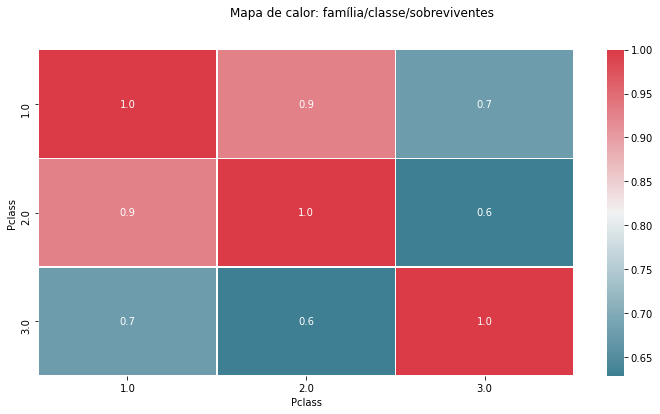

In [9]:
cl = familia[[1.0, 2.0, 3.0]]
cl = cl.corr(method = 'spearman')
mask = np.zeros_like(cl, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)


#configurando a figura do gráfico
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(cl, annot=True, linewidths=0.5, ax=ax, fmt='.1f', cmap=cmap)
fig.suptitle('Mapa de calor: família/classe/sobreviventes')

Na 1ª e 2ª classe, a chance de sobreviência estando acompanhado foi maior do que na 3ª classe

Text(0.5, 0.98, 'Mapa 2 - Pearson')

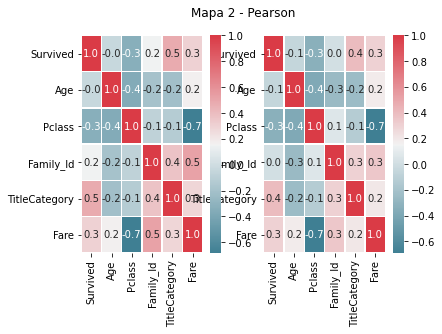

In [10]:
#variáveis Mapa 1
cluster1 = trainDF[['Survived', 'Age', 'Pclass', 'Sex', 'Family_Id', 'TitleCategory', 'Fare']]
cluster1 = cluster1.corr(method = 'spearman')
mask = np.zeros_like(cluster1, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)

#variáveis Mapa 2
cluster2 = trainDF[['Survived', 'Age', 'Pclass', 'Sex', 'Family_Id', 'TitleCategory', 'Fare']]
cluster2 = cluster2.corr(method = 'pearson')
mask2 = np.zeros_like(cluster2, dtype=np.bool)

mask[np.triu_indices_from(mask2)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)

#PLOTS

#configurando a figura do gráfico
fig, axs = plt.subplots(1,2)

sns.heatmap(cluster1, annot=True, linewidths=0.5, ax=axs[0], fmt='.1f', cmap=cmap)
fig.suptitle('Mapa 1 - Spearman')
#fig.figsize= (12,6)

#configurando a figura do gráfico
sns.heatmap(cluster2, annot=True, linewidths=0.5, ax=axs[1], fmt='.1f', cmap=cmap)
fig.suptitle('Mapa 2 - Pearson')

Pairplot para todos os passageiros

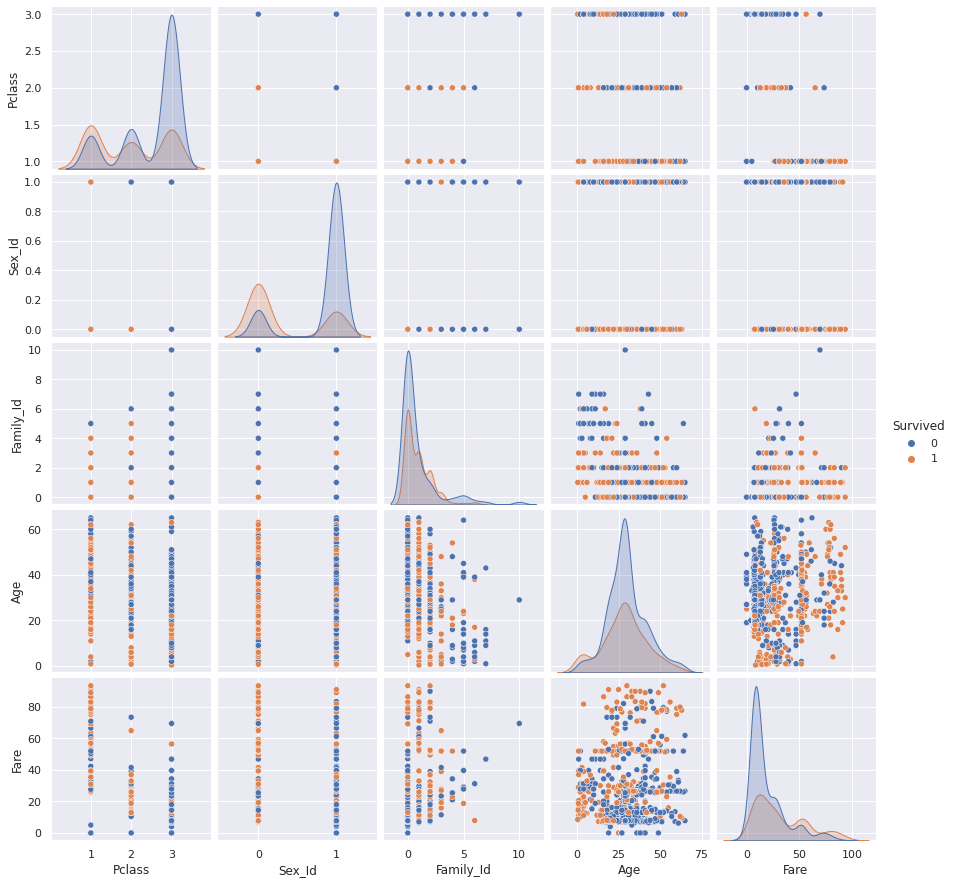

In [11]:
sns.set() #setting a style
g = sns.pairplot(trainDF, vars=['Pclass', 'Sex_Id', 'Family_Id', 'Age', 'Fare'], hue='Survived') # returns a pair grid
#g.map_upper(sns.kdeplot, n_levels=5, color='orange')
plt.show()

Pairplot para os sobreviventes

In [ ]:
sns.pairplot(trainDF[trainDF['Survived']==1], vars=['Pclass', 'Age', 'Fare'], hue='Sex', diag_kind='kde', \
             plot_kws= {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size=4);

#Title
plt.suptitle('Pairplot dos sobreviventes', size=22, x=-0.3, y=.95, \
             horizontalalignment= 'left', verticalalignment='top')

## Análise estatística - Medidas de Correlação

In [12]:
import scipy.stats as stats 
from scipy.stats import kstest, spearmanr, pearsonr

### Método de Pearson

In [13]:
(Rho, p_value) = pearsonr(trainDF['Age'],trainDF['Survived'])
print('Coef. de Correlação Pearson: {:.2f}'.format(Rho))
print('P-value: {}'.format(p_value))

Coef. de Correlação Pearson: -0.06
P-value: 0.089933310589249


### Método de Spearman

In [15]:
(sprho, p_value) = spearmanr(trainDF['Age'],trainDF['Survived'], nan_policy='omit')
print('Coef. de Correlação Spearman: {:.3f}'.format(sprho))
print('P-value: {}'.format(p_value))

Coef. de Correlação Spearman: -0.032
P-value: 0.3210312159182245


In [16]:
rng = np.random.default_rng()

In [17]:
x = np.linspace(-15, 15, 9)
stats.kstest(x, 'norm')

KstestResult(statistic=0.4443560271592436, pvalue=0.03885014008678811)